In [39]:
import os

import pandas as pd
import numpy as np
import pandas_datareader.data as pdr 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.tsa import seasonal
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

import seaborn as sns
plt.style.use('seaborn-whitegrid')
from pylab import rcParams
%matplotlib inline
import itertools

import warnings 
warnings.filterwarnings(action='ignore')

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [40]:
#한글폰트 적용
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('월별 총물동량.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.shape)

#data.dtypes --> float type 확인
data['평균미국달러환율'] = (data['평균미국달러환율'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
data['부산항수출금액'] = (data['부산항수출금액'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
data['부산항수입금액'] = (data['부산항수입금액'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
#data.dtypes # object로 잘못 인식한 데이터 float로 조정 

data.head()

(267, 12)


,TEU,BDI,무역수지,평균국제유가,평균미국달러환율,운송수지,경상수지,경기종합지수,수출물가지수,수입물가지수,부산항수출금액,부산항수입금액
Date,,,,,,,,,,,,
2000-01-31,464000,1319,-432198,25.22,1131.07,85.6,-218.1,58.5,133.88,75.60,5140310.0,3605241.0
2000-02-29,480000,1531,652390,27.02,1128.80,91.1,-324.1,58.7,130.56,75.92,4984788.0,3321729.0
2000-03-31,541000,1660,217692,27.40,1117.19,144.3,275.3,59.0,128.19,75.88,6047778.0,4080972.0
2000-04-30,491000,1628,177508,23.62,1109.76,174.7,-1156.0,58.8,126.84,73.88,5593812.0,3823350.0
2000-05-31,556000,1566,1353399,27.37,1120.01,57.3,1535.5,58.8,127.89,75.46,5914069.0,3908017.0


### 전체 시계열 

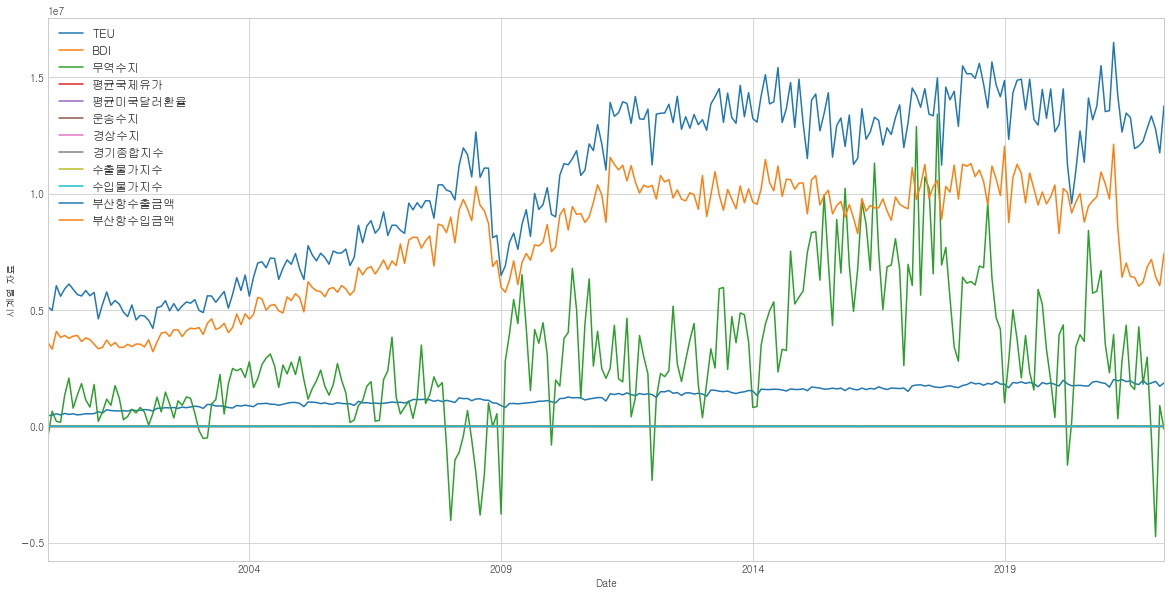

In [4]:
data.plot(figsize=(20, 10))
plt.legend(fontsize="large")
plt.xlabel("Date")
plt.ylabel("시계열 자료");

### TEU 분해 

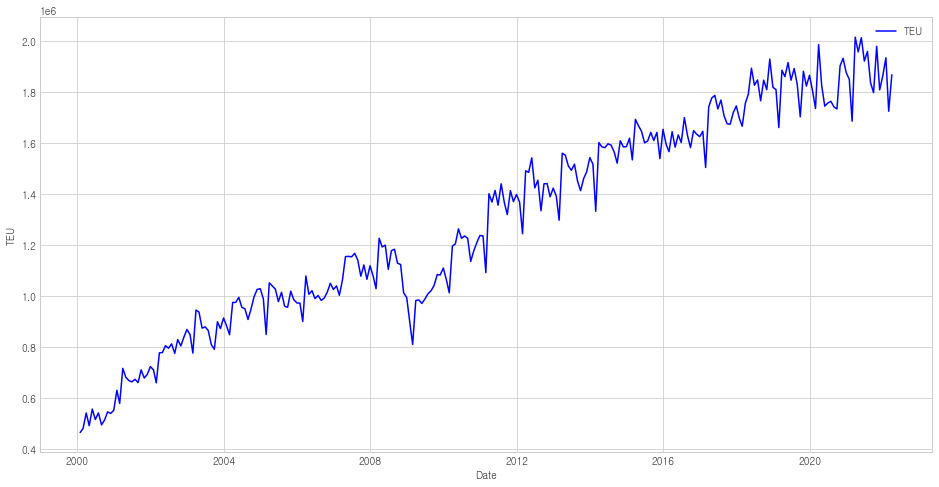

In [5]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('TEU')
plt.plot(data['TEU'], 'blue', label='TEU')
plt.legend()

In [6]:
decomposition = sm.tsa.seasonal_decompose(data['TEU'],model='additive',period=12,extrapolate_trend='freq')
trend = decomposition.trend
print('추세 성분 NA 개수:',trend.isna().sum(),'개')
seasonal = decomposition.seasonal
print('계절 성분 NA 개수:',seasonal.isna().sum(),'개')
residual = decomposition.resid
print('랜덤 성분 NA 개수:',residual.isna().sum(),'개')

추세 성분 NA 개수: 0 개
계절 성분 NA 개수: 0 개
랜덤 성분 NA 개수: 0 개


Text(0.5, 1.0, 'Residual')

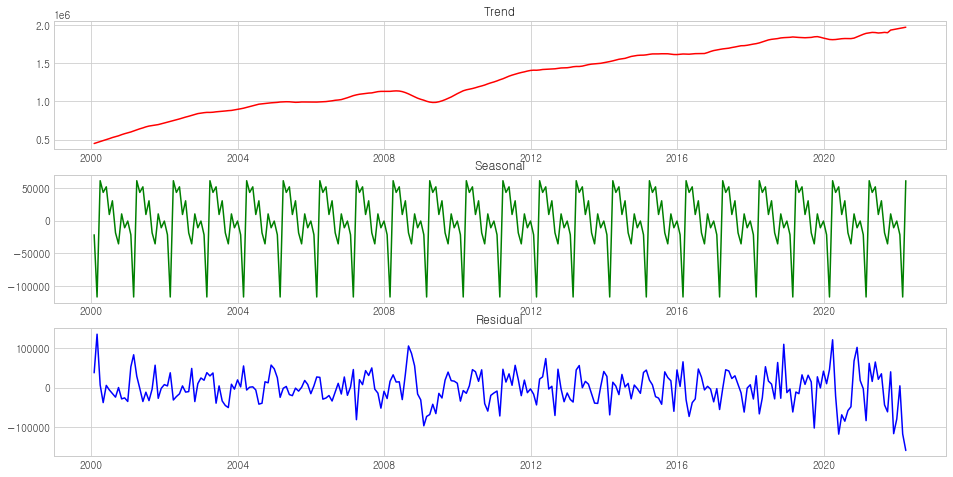

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(3, 1, 1)
plt.plot(data.index, decomposition.trend,'red',label='TEU')
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(data.index, decomposition.seasonal,'green',label='TEU')
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(data.index, decomposition.resid,'blue',label='TEU')
plt.title('Residual')

In [8]:
trend = pd.DataFrame(decomposition.trend)
seasonal = pd.DataFrame(decomposition.seasonal)
resid = pd.DataFrame(decomposition.resid)
decompose_df = pd.concat([trend,seasonal,resid],axis=1)
decompose_df. rename(columns = {'trend':'TEU_Trend','seasonal':'TEU_Seasonal','resid':'TEU_Resid'}, inplace = True)
decompose_df.to_csv('TEU분해.csv', sep=',',index= True)

### BDI 분해 

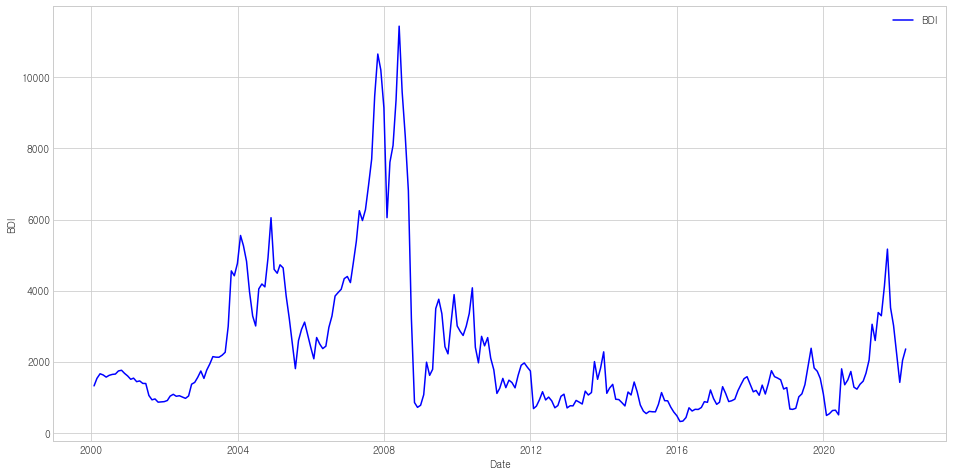

In [9]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('BDI')
plt.plot(data['BDI'], 'blue', label='BDI')
plt.legend()

In [10]:
decomposition = sm.tsa.seasonal_decompose(data['BDI'],model='additive',period=12,extrapolate_trend='freq')
trend = decomposition.trend
print('추세 성분 NA 개수:',trend.isna().sum(),'개')
seasonal = decomposition.seasonal
print('계절 성분 NA 개수:',seasonal.isna().sum(),'개')
residual = decomposition.resid
print('랜덤 성분 NA 개수:',residual.isna().sum(),'개')

추세 성분 NA 개수: 0 개
계절 성분 NA 개수: 0 개
랜덤 성분 NA 개수: 0 개


Text(0.5, 1.0, 'Residual')

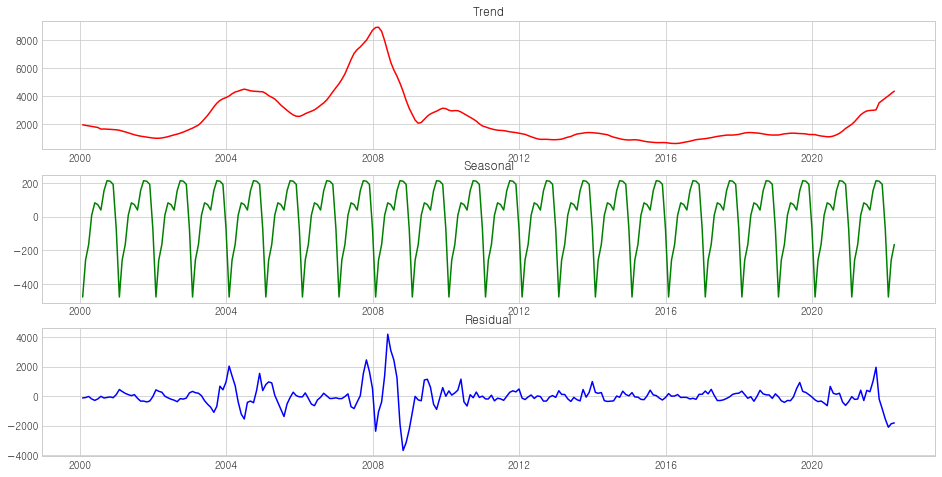

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(3, 1, 1)
plt.plot(data.index, decomposition.trend,'red',label='BDI')
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(data.index, decomposition.seasonal,'green',label='BDI')
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(data.index, decomposition.resid,'blue',label='BDI')
plt.title('Residual')

In [12]:
trend = pd.DataFrame(decomposition.trend)
seasonal = pd.DataFrame(decomposition.seasonal)
resid = pd.DataFrame(decomposition.resid)
decompose_df = pd.concat([trend,seasonal,resid],axis=1)
decompose_df. rename(columns = {'trend':'BDI_Trend','seasonal':'BDI_Seasonal','resid':'BDI_Resid'}, inplace = True)
decompose_df.to_csv('BDI분해.csv', sep=',',index= True)

### 무역수지 분해 

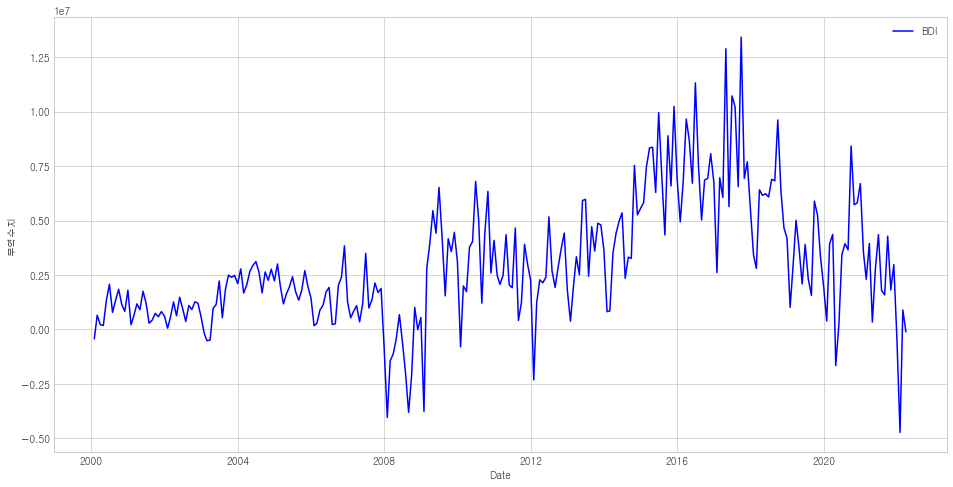

In [13]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('무역수지')
plt.plot(data['무역수지'], 'blue', label='BDI')
plt.legend()

In [14]:
decomposition = sm.tsa.seasonal_decompose(data['무역수지'],model='additive',period=12,extrapolate_trend='freq')
trend = decomposition.trend
print('추세 성분 NA 개수:',trend.isna().sum(),'개')
seasonal = decomposition.seasonal
print('계절 성분 NA 개수:',seasonal.isna().sum(),'개')
residual = decomposition.resid
print('랜덤 성분 NA 개수:',residual.isna().sum(),'개')

추세 성분 NA 개수: 0 개
계절 성분 NA 개수: 0 개
랜덤 성분 NA 개수: 0 개


Text(0.5, 1.0, 'Residual')

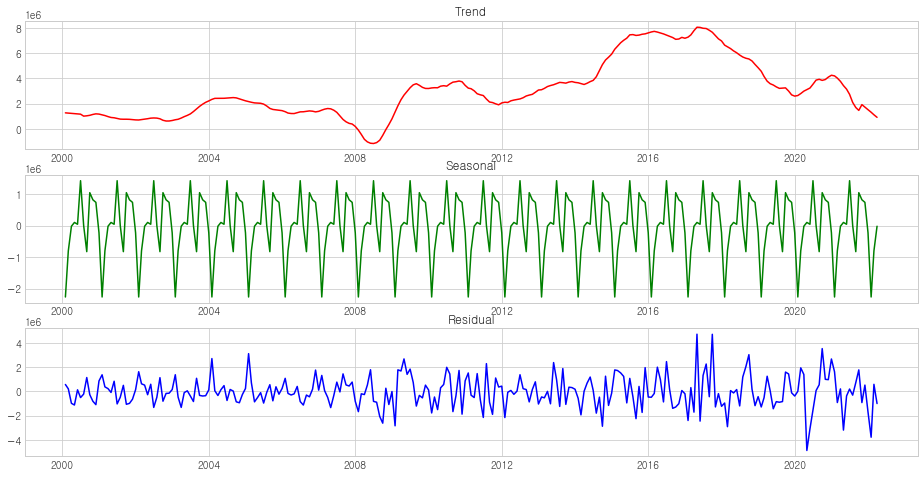

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(3, 1, 1)
plt.plot(data.index, decomposition.trend,'red',label='무역수지')
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(data.index, decomposition.seasonal,'green',label='무역수지')
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(data.index, decomposition.resid,'blue',label='무역수지')
plt.title('Residual')

In [16]:
trend = pd.DataFrame(decomposition.trend)
seasonal = pd.DataFrame(decomposition.seasonal)
resid = pd.DataFrame(decomposition.resid)
decompose_df = pd.concat([trend,seasonal,resid],axis=1)
decompose_df. rename(columns = {'trend':'무역수지_Trend','seasonal':'무역수지_Seasonal','resid':'무역수지_Resid'}, inplace = True)
decompose_df.to_csv('무역수지분해.csv', sep=',',index= True,encoding='cp949')

### 경상수지 분해 

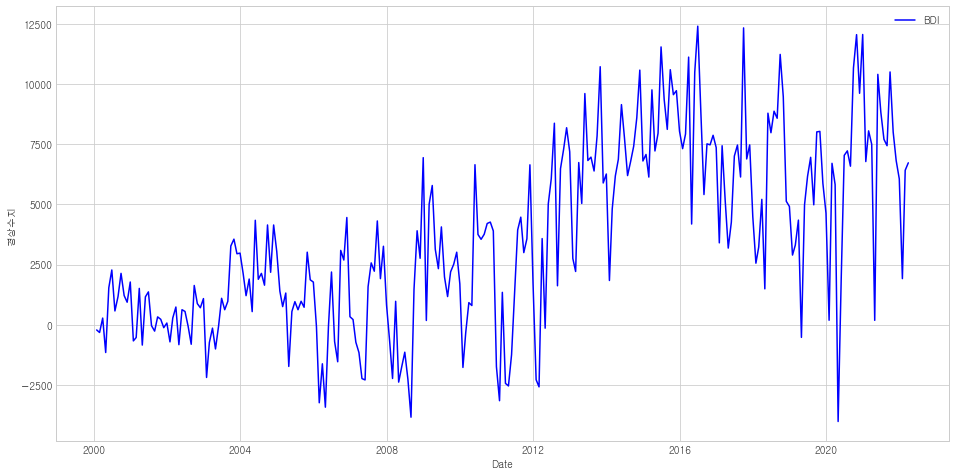

In [17]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('경상수지')
plt.plot(data['경상수지'], 'blue', label='BDI')
plt.legend()

In [38]:
decomposition = sm.tsa.seasonal_decompose(data['경상수지'],model='additive',period=12,extrapolate_trend='freq')
trend = decomposition.trend
print('추세 성분 NA 개수:',trend.isna().sum(),'개')
seasonal = decomposition.seasonal
print('계절 성분 NA 개수:',seasonal.isna().sum(),'개')
residual = decomposition.resid
print('랜덤 성분 NA 개수:',residual.isna().sum(),'개')

추세 성분 NA 개수: 0 개
계절 성분 NA 개수: 0 개
랜덤 성분 NA 개수: 0 개


Text(0.5, 1.0, 'Residual')

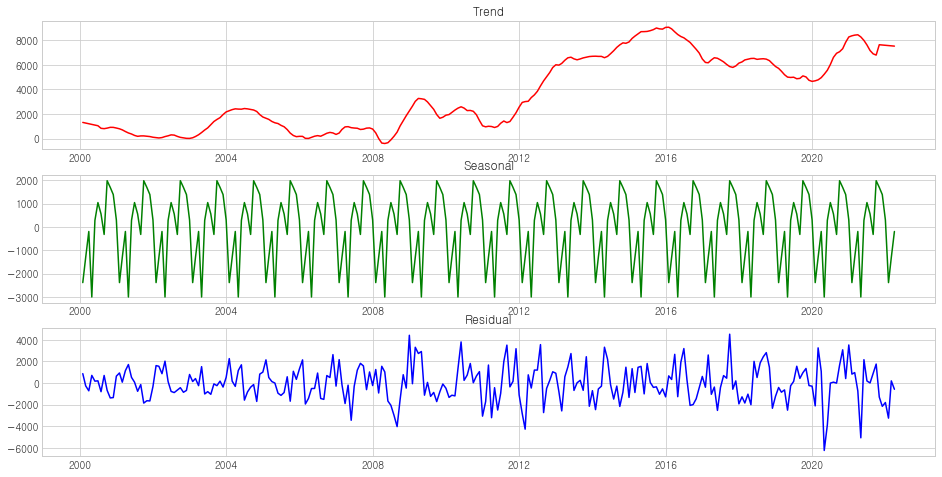

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(3, 1, 1)
plt.plot(data.index, decomposition.trend,'red',label='경상수지')
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(data.index, decomposition.seasonal,'green',label='경상수지')
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(data.index, decomposition.resid,'blue',label='경상수지')
plt.title('Residual')

In [20]:
trend = pd.DataFrame(decomposition.trend)
seasonal = pd.DataFrame(decomposition.seasonal)
resid = pd.DataFrame(decomposition.resid)
decompose_df = pd.concat([trend,seasonal,resid],axis=1)
decompose_df. rename(columns = {'trend':'경상수지_Trend','seasonal':'경상수지_Seasonal','resid':'경상수지_Resid'}, inplace = True)
decompose_df.to_csv('경상수지분해.csv', sep=',',index= True,encoding='cp949')

### 경기종합지수 분해 

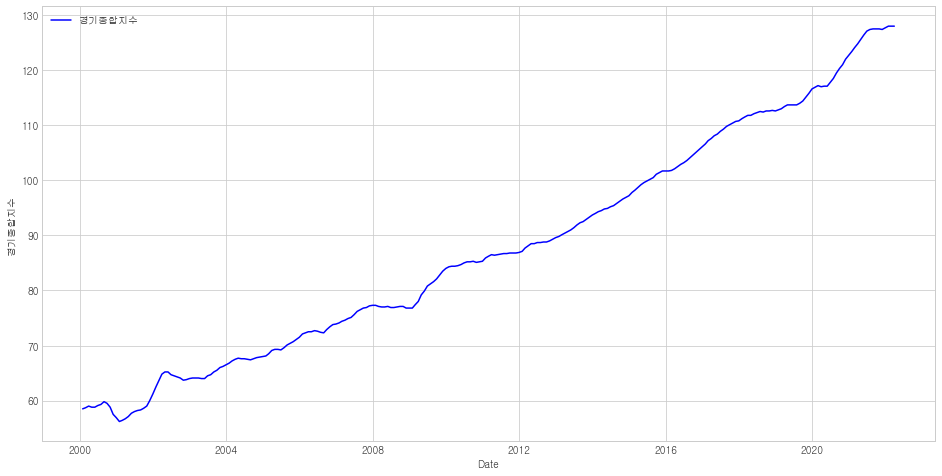

In [21]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('경기종합지수')
plt.plot(data['경기종합지수'], 'blue', label='경기종합지수')
plt.legend()

In [22]:
decomposition = sm.tsa.seasonal_decompose(data['경기종합지수'],model='additive',period=12,extrapolate_trend='freq')
trend = decomposition.trend
print('추세 성분 NA 개수:',trend.isna().sum(),'개')
seasonal = decomposition.seasonal
print('계절 성분 NA 개수:',seasonal.isna().sum(),'개')
residual = decomposition.resid
print('랜덤 성분 NA 개수:',residual.isna().sum(),'개')

추세 성분 NA 개수: 0 개
계절 성분 NA 개수: 0 개
랜덤 성분 NA 개수: 0 개


Text(0.5, 1.0, 'Residual')

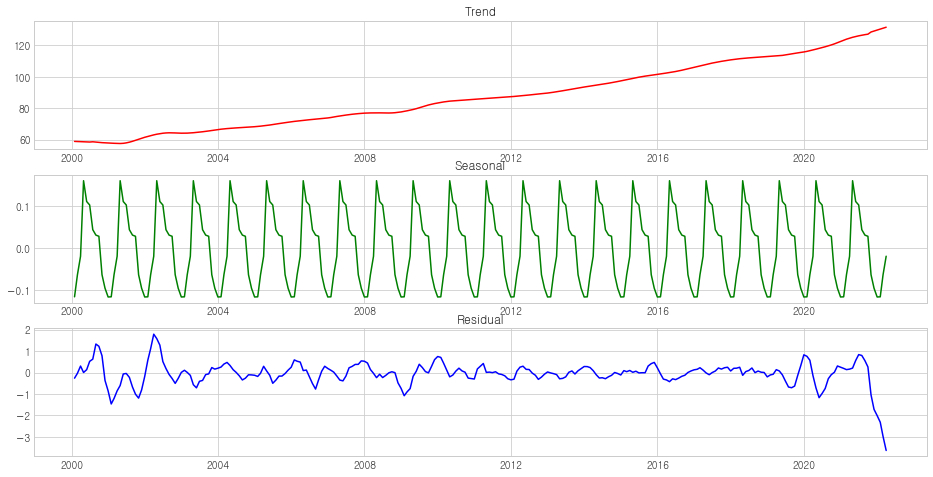

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(3, 1, 1)
plt.plot(data.index, decomposition.trend,'red',label='경기종합지수')
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(data.index, decomposition.seasonal,'green',label='경기종합지수')
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(data.index, decomposition.resid,'blue',label='경기종합지수')
plt.title('Residual')

In [24]:
trend = pd.DataFrame(decomposition.trend)
seasonal = pd.DataFrame(decomposition.seasonal)
resid = pd.DataFrame(decomposition.resid)
decompose_df = pd.concat([trend,seasonal,resid],axis=1)
decompose_df. rename(columns = {'trend':'경기종합지수_Trend','seasonal':'경기종합지수_Seasonal','resid':'경기종합지수_Resid'}, inplace = True)
decompose_df.to_csv('경기종합지수분해.csv', sep=',',index= True,encoding='cp949')

### 수출물가지수 분해 

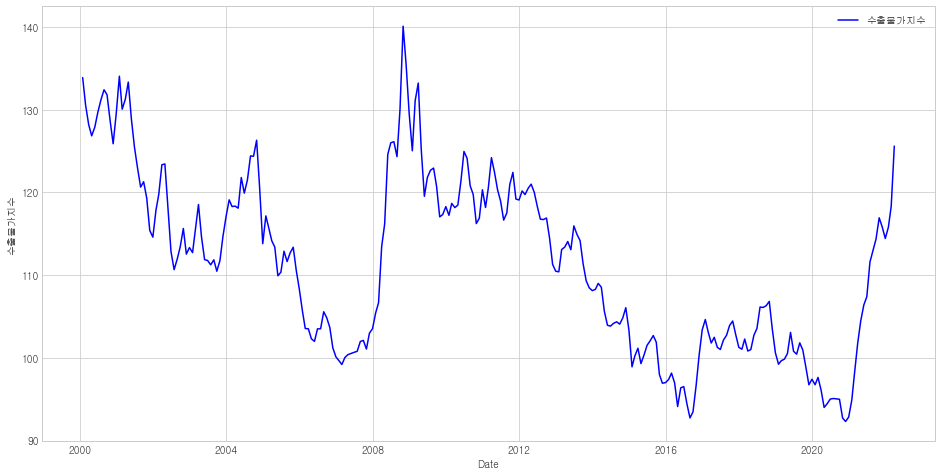

In [25]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('수출물가지수')
plt.plot(data['수출물가지수'], 'blue', label='수출물가지수')
plt.legend()

In [26]:
decomposition = sm.tsa.seasonal_decompose(data['수출물가지수'],model='additive',period=12,extrapolate_trend='freq')
trend = decomposition.trend
print('추세 성분 NA 개수:',trend.isna().sum(),'개')
seasonal = decomposition.seasonal
print('계절 성분 NA 개수:',seasonal.isna().sum(),'개')
residual = decomposition.resid
print('랜덤 성분 NA 개수:',residual.isna().sum(),'개')

추세 성분 NA 개수: 0 개
계절 성분 NA 개수: 0 개
랜덤 성분 NA 개수: 0 개


Text(0.5, 1.0, 'Residual')

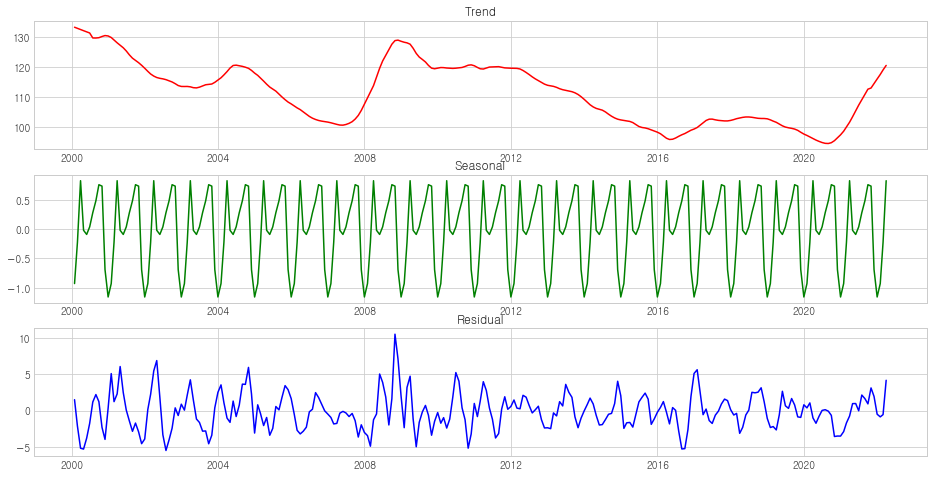

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(3, 1, 1)
plt.plot(data.index, decomposition.trend,'red',label='수출물가지수')
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(data.index, decomposition.seasonal,'green',label='수출물가지수')
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(data.index, decomposition.resid,'blue',label='수출물가지수')
plt.title('Residual')

In [28]:
trend = pd.DataFrame(decomposition.trend)
seasonal = pd.DataFrame(decomposition.seasonal)
resid = pd.DataFrame(decomposition.resid)
decompose_df = pd.concat([trend,seasonal,resid],axis=1)
decompose_df. rename(columns = {'trend':'수출물가지수_Trend','seasonal':'수출물가지수_Seasonal','resid':'수출물가지수_Resid'}, inplace = True)
decompose_df.to_csv('수출물가지수.csv', sep=',',index= True,encoding='cp949')

### 부산항수출금액 분해 

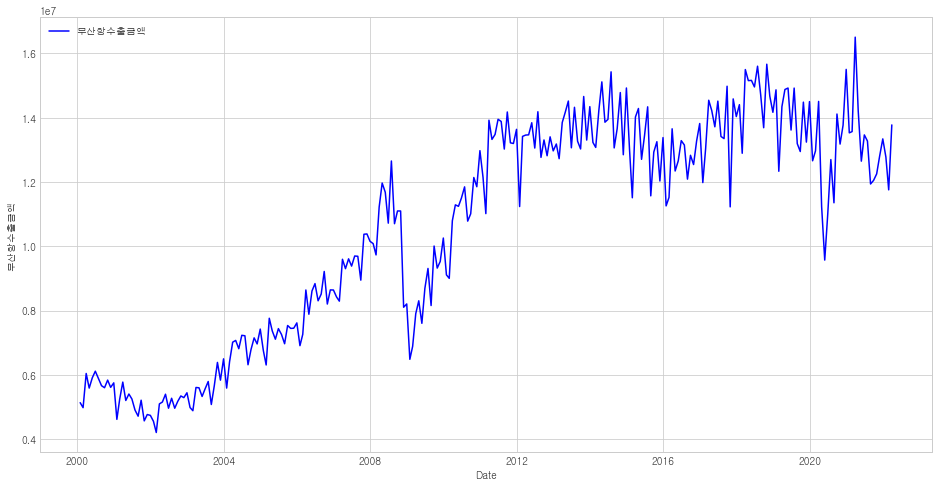

In [29]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('부산항수출금액')
plt.plot(data['부산항수출금액'], 'blue', label='부산항수출금액')
plt.legend()

In [30]:
decomposition = sm.tsa.seasonal_decompose(data['부산항수출금액'],model='additive',period=12,extrapolate_trend='freq')
trend = decomposition.trend
print('추세 성분 NA 개수:',trend.isna().sum(),'개')
seasonal = decomposition.seasonal
print('계절 성분 NA 개수:',seasonal.isna().sum(),'개')
residual = decomposition.resid
print('랜덤 성분 NA 개수:',residual.isna().sum(),'개')

추세 성분 NA 개수: 0 개
계절 성분 NA 개수: 0 개
랜덤 성분 NA 개수: 0 개


Text(0.5, 1.0, 'Residual')

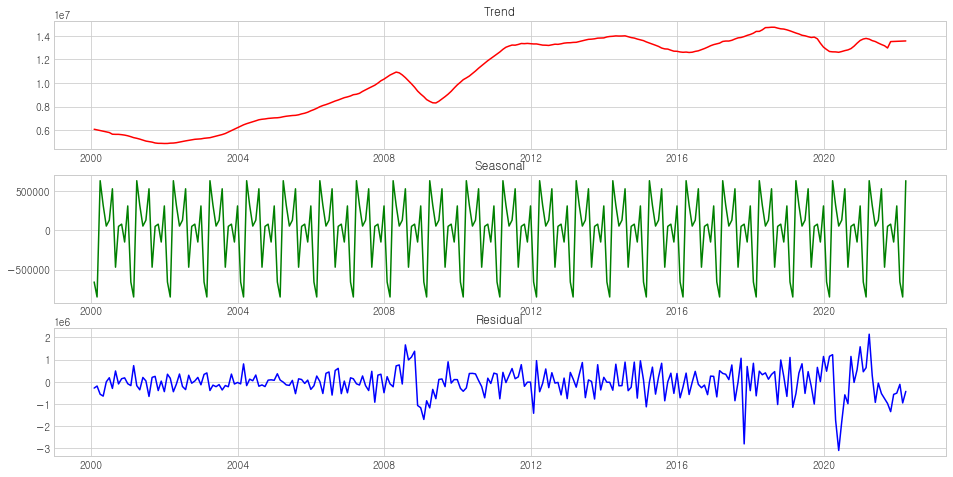

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(3, 1, 1)
plt.plot(data.index, decomposition.trend,'red',label='부산항수출금액')
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(data.index, decomposition.seasonal,'green',label='부산항수출금액')
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(data.index, decomposition.resid,'blue',label='부산항수출금액')
plt.title('Residual')

In [32]:
trend = pd.DataFrame(decomposition.trend)
seasonal = pd.DataFrame(decomposition.seasonal)
resid = pd.DataFrame(decomposition.resid)
decompose_df = pd.concat([trend,seasonal,resid],axis=1)
decompose_df. rename(columns = {'trend':'부산항수출금액_Trend','seasonal':'부산항수출금액_Seasonal','resid':'부산항수출금액_Resid'}, inplace = True)
decompose_df.to_csv('부산항수출금액.csv', sep=',',index= True,encoding='cp949')

### 부산항수입금액 분해 

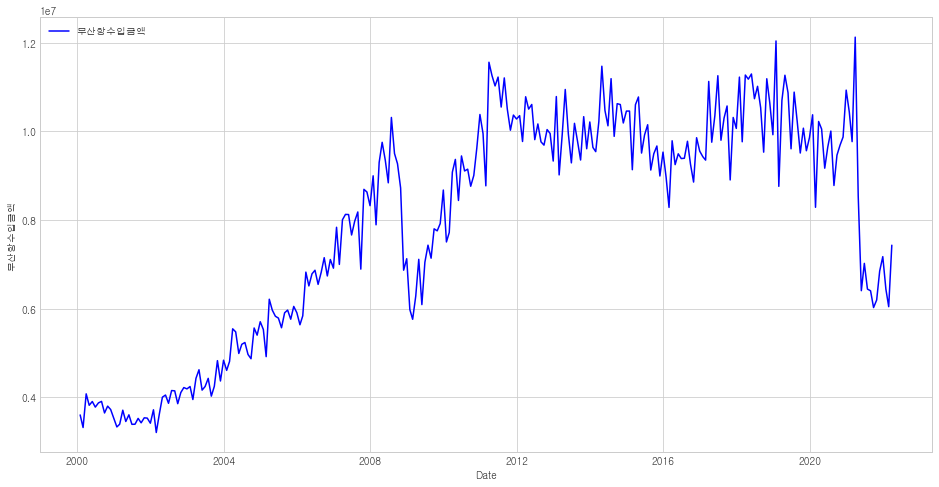

In [33]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('부산항수입금액')
plt.plot(data['부산항수입금액'], 'blue', label='부산항수입금액')
plt.legend()

In [34]:
decomposition = sm.tsa.seasonal_decompose(data['부산항수입금액'],model='additive',period=12,extrapolate_trend='freq')
trend = decomposition.trend
print('추세 성분 NA 개수:',trend.isna().sum(),'개')
seasonal = decomposition.seasonal
print('계절 성분 NA 개수:',seasonal.isna().sum(),'개')
residual = decomposition.resid
print('랜덤 성분 NA 개수:',residual.isna().sum(),'개')

추세 성분 NA 개수: 0 개
계절 성분 NA 개수: 0 개
랜덤 성분 NA 개수: 0 개


Text(0.5, 1.0, 'Residual')

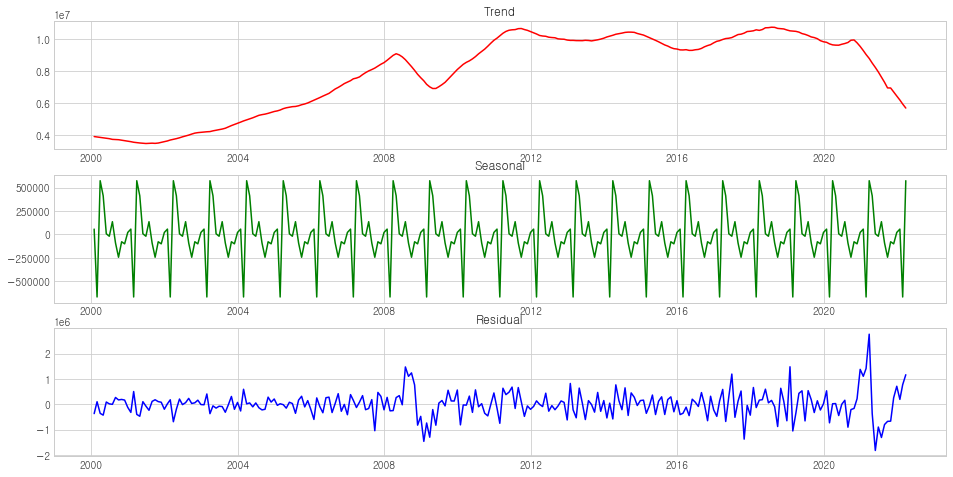

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(3, 1, 1)
plt.plot(data.index, decomposition.trend,'red',label='부산항수입금액')
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(data.index, decomposition.seasonal,'green',label='부산항수입금액')
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(data.index, decomposition.resid,'blue',label='부산항수입금액')
plt.title('Residual')

In [36]:
trend = pd.DataFrame(decomposition.trend)
seasonal = pd.DataFrame(decomposition.seasonal)
resid = pd.DataFrame(decomposition.resid)
decompose_df = pd.concat([trend,seasonal,resid],axis=1)
decompose_df. rename(columns = {'trend':'부산항수입금액_Trend','seasonal':'부산항수입금액_Seasonal','resid':'부산항수입금액_Resid'}, inplace = True)
decompose_df.to_csv('부산항수입금액.csv', sep=',',index= True,encoding='cp949')

### ln(HRCI) 분해 

In [42]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('월별 총물동량2.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

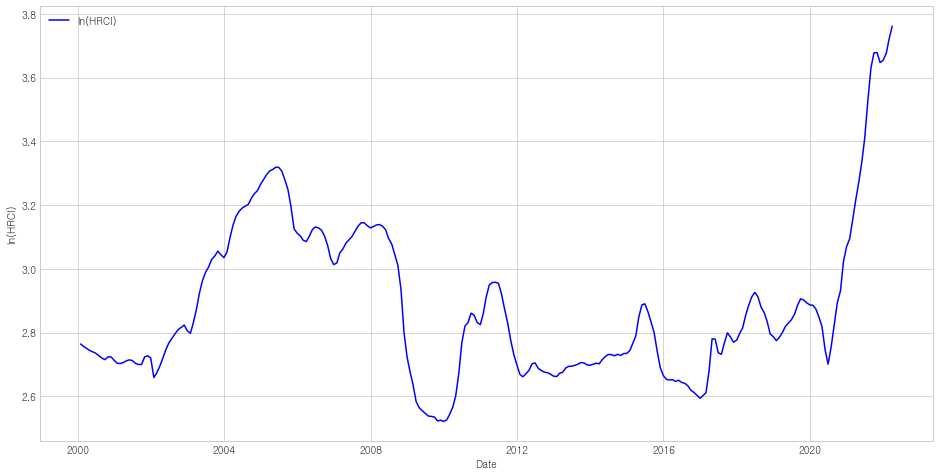

In [43]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('ln(HRCI)')
plt.plot(data['ln(HRCI)'], 'blue', label='ln(HRCI)')
plt.legend()

In [44]:
decomposition = sm.tsa.seasonal_decompose(data['ln(HRCI)'],model='additive',period=12,extrapolate_trend='freq')
trend = decomposition.trend
print('추세 성분 NA 개수:',trend.isna().sum(),'개')
seasonal = decomposition.seasonal
print('계절 성분 NA 개수:',seasonal.isna().sum(),'개')
residual = decomposition.resid
print('랜덤 성분 NA 개수:',residual.isna().sum(),'개')

추세 성분 NA 개수: 0 개
계절 성분 NA 개수: 0 개
랜덤 성분 NA 개수: 0 개


In [45]:
trend = pd.DataFrame(decomposition.trend)
seasonal = pd.DataFrame(decomposition.seasonal)
resid = pd.DataFrame(decomposition.resid)
decompose_df = pd.concat([trend,seasonal,resid],axis=1)
decompose_df. rename(columns = {'trend':'ln(HRCI)_Trend','seasonal':'ln(HRCI)_Seasonal','resid':'ln(HRCI)_Resid'}, inplace = True)
decompose_df.to_csv('ln(HRCI).csv', sep=',',index= True)